# Ganger Causality 

In [1]:
# packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import warnings
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
warnings.filterwarnings('ignore')

style.use('ggplot')

In [2]:
#datasatet
df = pd.read_csv('chicken_egg.csv')

df.head()

,chicken,egg
0,468491,3581
1,449743,3532
2,436815,3327
3,444523,3255
4,433937,3156


In [3]:
df.shape

(54, 2)

In [4]:
# isolating eggs and chickens

eggs = df[['egg']]
chickens = df[['chicken']]

display(eggs.head())
display(chickens.head())

,egg
0,3581
1,3532
2,3327
3,3255
4,3156


,chicken
0,468491
1,449743
2,436815
3,444523
4,433937


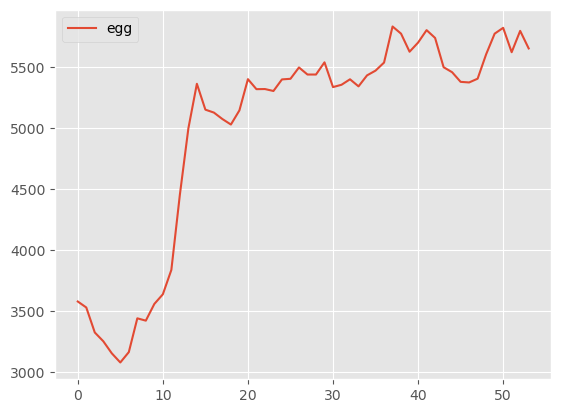

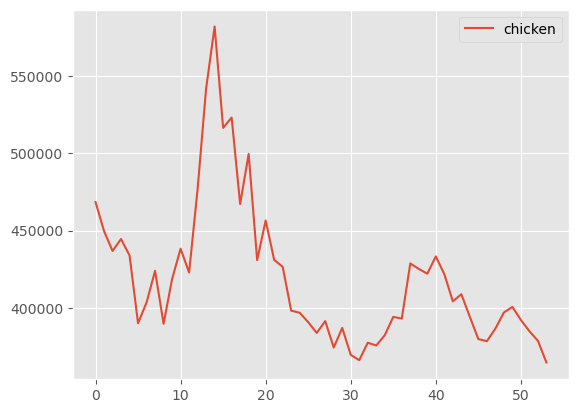

In [5]:
#plots

eggs.plot()
chickens.plot()
plt.show()

Seems the curves aren't stationary

In [6]:
#stationarity check

st_eggs = adfuller(eggs)

st_chickens = adfuller(chickens)

print('Chickens p-value: %F' % st_chickens[1])

print('Eggs p-value: %F' % st_eggs[1])


Chickens p-value: 0.300495
Eggs p-value: 0.423186


Both are not stationary (p-value > .05)

In [7]:
# applying one difference

diff_eggs = eggs.copy()
diff_eggs['diff'] = diff_eggs['egg'].diff()
diff_eggs.dropna(inplace = True)
diff_eggs = diff_eggs[['diff']].rename(columns = {'diff': 'eggs'})
diff_eggs.head()

,eggs
1,-49.0
2,-205.0
3,-72.0
4,-99.0
5,-75.0


In [8]:
diff_chickens = chickens.copy()
diff_chickens['diff'] = diff_chickens['chicken'].diff()
diff_chickens.dropna(inplace = True)
diff_chickens = diff_chickens[['diff']].rename(columns = {'diff': 'chickens'})
diff_chickens.head()

,chickens
1,-18748.0
2,-12928.0
3,7708.0
4,-10586.0
5,-43979.0


In [9]:
#check stationarity again


st_deggs = adfuller(diff_eggs)

st_dchickens = adfuller(diff_chickens)

print('Chickens p-value: %F' % st_dchickens[1])

print('Eggs p-value: %F' % st_deggs[1])


Chickens p-value: 0.003168
Eggs p-value: 0.000067


Now we have stationarity with one lag

In [10]:
#creating two dfs

df_chicken = pd.concat([diff_chickens, diff_eggs], axis = 1)


display(df_chicken.shape)
df_chicken.head()

(53, 2)

,chickens,eggs
1,-18748.0,-49.0
2,-12928.0,-205.0
3,7708.0,-72.0
4,-10586.0,-99.0
5,-43979.0,-75.0


In [11]:
df_eggs = pd.concat([diff_eggs, diff_chickens], axis = 1)


display(df_eggs.shape)
df_eggs.head()

(53, 2)

,eggs,chickens
1,-49.0,-18748.0
2,-205.0,-12928.0
3,-72.0,7708.0
4,-99.0,-10586.0
5,-75.0,-43979.0


In [12]:
# do granger causality test

grangertest_chickens = grangercausalitytests(df_chicken, 15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.3694 , p=0.0023  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=11.0043 , p=0.0009  , df=1
likelihood ratio test: chi2=9.9819  , p=0.0016  , df=1
parameter F test:         F=10.3694 , p=0.0023  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9196  , p=0.0268  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=8.6913  , p=0.0130  , df=2
likelihood ratio test: chi2=8.0254  , p=0.0181  , df=2
parameter F test:         F=3.9196  , p=0.0268  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9318  , p=0.0441  , df_denom=43, df_num=3
ssr based chi2 test:   chi2=10.2270 , p=0.0167  , df=3
likelihood ratio test: chi2=9.3049  , p=0.0255  , df=3
parameter F test:         F=2.9318  , p=0.0441  , df_denom=43, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.1762  , p=0.0064  , df_d

So until 6 periods we have that eggs Granger lead chickens

In [13]:
grangertest_eggs = grangercausalitytests(df_eggs, 15)
grangertest_eggs


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5434  , p=0.4646  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=0.5766  , p=0.4476  , df=1
likelihood ratio test: chi2=0.5734  , p=0.4489  , df=1
parameter F test:         F=0.5434  , p=0.4646  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3865  , p=0.6816  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=0.8571  , p=0.6515  , df=2
likelihood ratio test: chi2=0.8500  , p=0.6538  , df=2
parameter F test:         F=0.3865  , p=0.6816  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2245  , p=0.8788  , df_denom=43, df_num=3
ssr based chi2 test:   chi2=0.7833  , p=0.8535  , df=3
likelihood ratio test: chi2=0.7772  , p=0.8549  , df=3
parameter F test:         F=0.2245  , p=0.8788  , df_denom=43, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2817  , p=0.8881  , df_d

{1: ({'ssr_ftest': (0.5433559398877741, 0.4645603271325349, 49.0, 1),
   'ssr_chi2test': (0.5766226300849848, 0.44763919540156927, 1),
   'lrtest': (0.5734490153902243, 0.44889161538627487, 1),
   'params_ftest': (0.543355939887809, 0.46456032713251894, 49.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.3865324025019798, 0.6815945120531489, 46.0, 2),
   'ssr_chi2test': (0.8570935881565638, 0.6514551055997209, 2),
   'lrtest': (0.8499712220999527, 0.6537791922582916, 2),
   'params_ftest': (0.38653240250203863, 0.6815945120531117, 46.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.22454871567222354, 0.8788077992760317, 43.0, 3),
   'ssr_chi2test': (0.7833094732751984, 0.8534548799479484, 3),
   'lrtest': (0.7772370747510422, 0.8549035149494942, 3),
   'params_ftest': (0.22454871567246934, 0.8788077992758596, 43.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

So we can conclude taht eggs Granger lead chicken.